### 线性回归
<img src='img/201.jpg'>

In [2]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

In [5]:
np.sum([0.5, 0.7, 0.2, 1.5])

2.9

In [10]:
# 在设置dtype的情况下,会先将元素转换成对应的类型再进行加法
np.sum([0.5, 0.7, 0.2, 1.5], dtype=np.int32)

1

<img src='img/202.jpg'>

In [3]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

(0.0, 2.0, 0.0, 12.0)

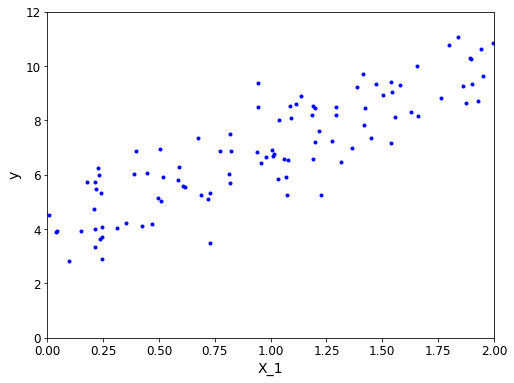

In [7]:
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,12])


In [8]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
X_b[:10]

array([[1.        , 1.19952997],
       [1.        , 0.67447154],
       [1.        , 0.24515577],
       [1.        , 1.50200814],
       [1.        , 1.18933858],
       [1.        , 1.03465905],
       [1.        , 1.99582155],
       [1.        , 0.23630683],
       [1.        , 1.01570435],
       [1.        , 0.42404762]])

In [12]:
theta_best

array([[3.8685294 ],
       [3.12315377]])

In [13]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.8685294 ],
       [10.11483694]])

(0.0, 2.0, 0.0, 12.0)

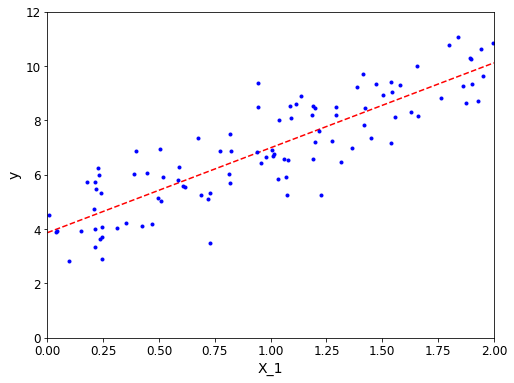

In [14]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict,'r--')
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,12])


In [18]:
np.random.rand(4,2,3)

array([[[0.86475964, 0.74651363, 0.06798173],
        [0.18088795, 0.39049799, 0.21525397]],

       [[0.10872896, 0.38213171, 0.06084526],
        [0.37689132, 0.60092799, 0.42716276]],

       [[0.32723691, 0.44061152, 0.54765864],
        [0.00354248, 0.83286824, 0.13571088]],

       [[0.66124662, 0.28257144, 0.86983072],
        [0.63014347, 0.59480755, 0.21279271]]])

In [19]:
np.random.randn(4,2,3)

array([[[ 0.03385953,  0.70024495,  0.35158089],
        [-2.51321236,  0.45317418,  0.31341874]],

       [[-0.40304015,  0.53196924, -0.24977996],
        [-0.16248693,  1.53885176,  0.25732122]],

       [[-0.10394513,  0.14233142,  0.63331744],
        [-1.59831514, -0.60946043, -1.28815211]],

       [[ 0.83978616,  0.06174933,  1.5791535 ],
        [ 1.33102263,  0.7979814 ,  1.06892651]]])

In [20]:
np.random.randn(4,2,1)

array([[[-1.07912335],
        [ 0.36665871]],

       [[ 0.83114425],
        [-0.60785204]],

       [[ 1.12357553],
        [-1.74886729]],

       [[ 0.52372026],
        [ 0.63506776]]])

#### 使用sklearn工具包实现线性回归之正规方程

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X,y)
print(linear.coef_)
print(linear.intercept_)

[[3.12315377]]
[3.8685294]


<img src='img/203.jpg'>
<img src='img/204.jpg'>

In [22]:
# 学习率 
lr = 0.1
# 样本个数 
m = 100
# 初始化theta值
theta = np.random.randn(2,1)
# 迭代次数
n_iterations = 1000

for iteration in range(n_iterations):
    # 计算梯度
    gradient = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    # 更新theta
    theta = theta - lr*gradient

In [23]:
theta

array([[3.8685294 ],
       [3.12315377]])

### 批量梯度下降

In [74]:
# batch gradient descent
theta_path_bgd = []

def plot_gradient_descent(theta,lr,theta_path = None):
    # 样本大小
    m = len(X_b)
    # 迭代次数
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        # 计算梯度
        gradient = 2/m*X_b.T.dot(X_b.dot(theta) - y)
        # 更新theta
        theta = theta - lr*gradient
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.plot(X,y,'b.')
    plt.xlabel('X_1')
    # plt.ylabel('y')
    plt.axis([0,2,0,13])  
    plt.title('learn_rate={}'.format(lr))


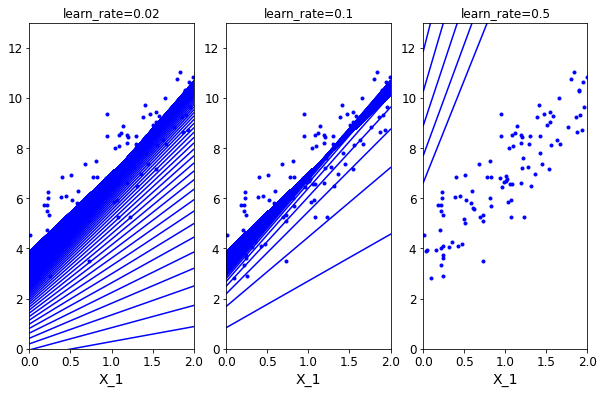

In [75]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,6))
plt.subplot(131)
plot_gradient_descent(theta,lr=0.02)
plt.subplot(132)
plot_gradient_descent(theta,lr=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,lr=0.5)

### 随机梯度下降

(0.0, 2.0, 0.0, 13.0)

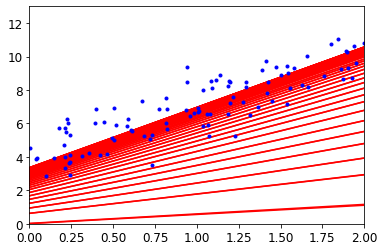

In [67]:
theta_path_sgd = []
m = len(X_b)
n_epochs = 50
# 学习率的衰减策略, 就是一开始学习率可以大一些,越到后面越来越小
t0 = 5
t1 = 50


def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

didi = 0

for epoch in range(n_epochs):
    for i in range(m):
        
        if i < 2:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        index = np.random.randint(m)
        xi = X_b[index:index+1]
        yi = y[index:index+1]
        # 计算梯度
        gradient = 2/m*xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(didi)
        # 更新theta
        theta = theta - lr*gradient
        theta_path_sgd.append(theta)

        if(didi < 100):
            didi += 1
plt.plot(X,y,'b.')
plt.axis([0,2,0,13])

In [68]:
index = 1
print(X_b[index:index+1],X_b[index])
print(y[index:index+1],y[index])

[[1.         0.67447154]] [1.         0.67447154]
[[7.36776215]] [7.36776215]


### 小批量梯度下降

In [100]:
theta_path_mgd = []
n_epochs = 50
minibatch = 16
# np.random.seed(23)
theta = np.random.randn(2,1)
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch):
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        # 计算梯度
        gradient = 2/m*xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(t)
        # 更新theta
        theta = theta - lr*gradient
        theta_path_mgd.append(theta)
        

In [101]:
theta

array([[3.55746857],
       [3.38333982]])

#### 三种策略的对比实验

In [102]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

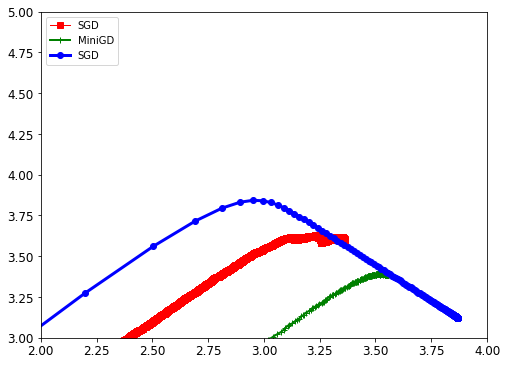

In [103]:
plt.figure(figsize=(8,6))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MiniGD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='SGD')
plt.axis([2,4,3,5])
plt.legend(loc='upper left')


实际当中应用minibatch比较多,一般情况下选择batch数量应当越大越好.

### 多项式回归

(-3.0, 3.0, 0.0, 15.0)

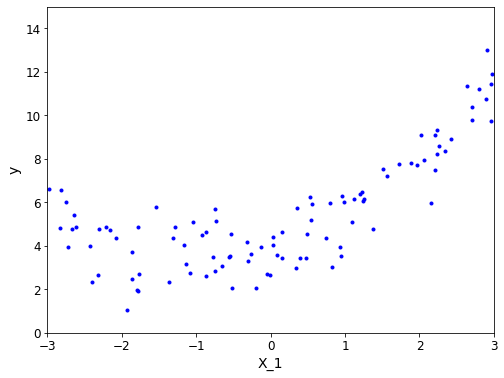

In [114]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 4 + X + 0.5*X**2 + np.random.randn(m,1) 
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,0,15])

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [121]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_poly,y)
print(linear.coef_)
print(linear.intercept_)

[[1.00518096 0.51073312]]
[3.87110975]


(-3.0, 3.0, 0.0, 15.0)

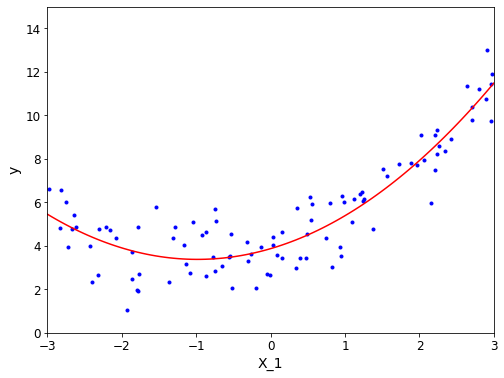

In [122]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_ploy = poly.transform(X_new)
y_predict = linear.predict(X_new_ploy)
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict,'r-')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,0,15])

### 使用sklearn管道流水线服务 Pipeline 来查看degree的过拟合问题
1. 多项式特征处理 PolynomialFeatures
2. 标准化处理 StandardScaler
3. 模型处理 LinearRegression

(-3.0, 3.0, 0.0, 15.0)

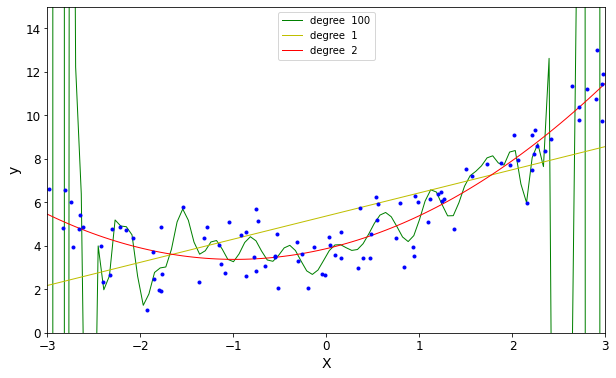

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(10,6))
for style,width,degree in (('g-',1,100),('y-',1,1),('r-',1,2)):
    pipe = Pipeline([
                    ('PolynomialFeatures',PolynomialFeatures(degree=degree, include_bias=False)),
                    ('StandardScaler',StandardScaler()),
                    ('LinearRegression',LinearRegression())
                    ])
    pipe.fit(X,y)
    y_new = pipe.predict(X_new)
    plt.plot(X_new,y_new,style,linewidth=width,label='degree  '+str(degree))

plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.axis([-3,3,0,15])

### 数据样本数量对结果的影响-过拟合

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    train_errors, test_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_errors')
    plt.plot(np.sqrt(test_errors),'b-',linewidth=2,label='test_errors')
    plt.legend()


(0.0, 80.0, 0.0, 25.0)

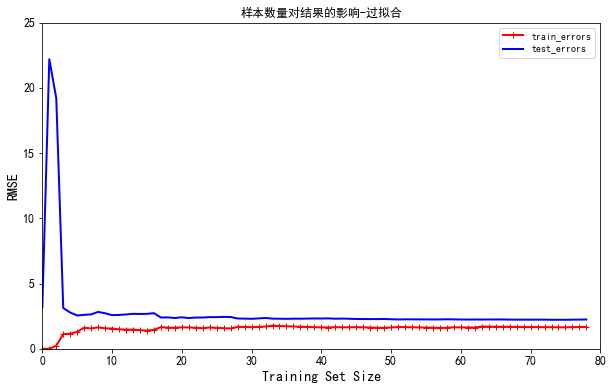

In [140]:
linear = LinearRegression()
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,6))
plot_learning_curves(linear,X,y)
plt.title('样本数量对结果的影响-过拟合')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.axis([0,80,0,25])

### 多项式回归的过拟合风险

(0.0, 80.0, 0.0, 25.0)

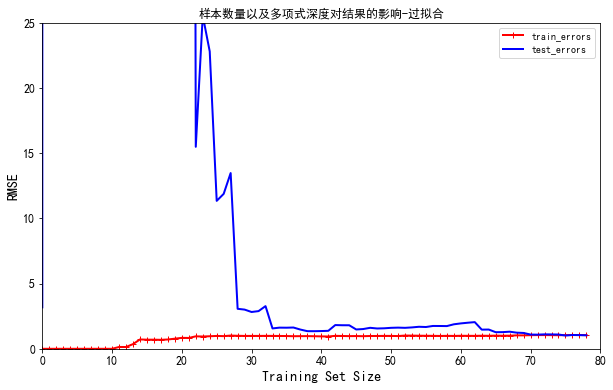

In [146]:
pipe = Pipeline([
                ('PolynomialFeatures',PolynomialFeatures(degree=10, include_bias=False)),
                ('LinearRegression',LinearRegression())
                ])
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,6))
plot_learning_curves(pipe,X,y)
plt.title('样本数量以及多项式深度对结果的影响-过拟合')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.axis([0,80,0,25])

### 正则化解决过拟合的问题
#### Ridge
<img src='img/205.jpg'>

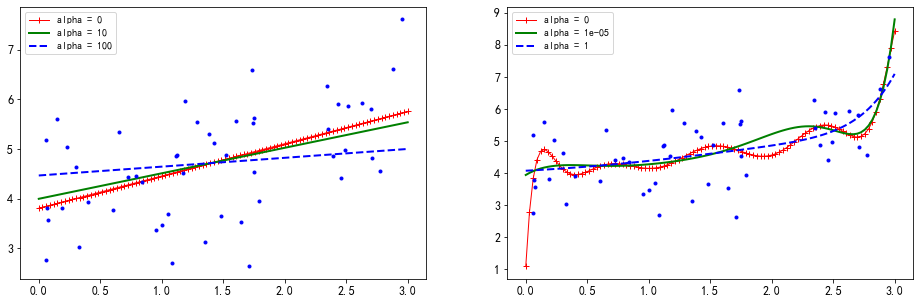

In [151]:
from sklearn.linear_model import Ridge
# 1 准备数据 
# 1.1 准备训练数据 
m = 50
X = 3*np.random.rand(m,1)
y = 4+0.5*X+np.random.randn(m,1)

# 1.2 准备测试数据
X_new = np.linspace(0,3,100).reshape(100,1)

# 2 定义对比函数 
# 2.1 是否开启多项式Polynomial 
# 2.2 alpha的不同
def plot_model(model_class, alphas, polynomial,**model_kargs):
    for alpha,style in zip(alphas,('r-+','g-','b--')):
        model = model_class(alpha)
        if polynomial:
            model = Pipeline([
                            ('PolynomialFeatures',PolynomialFeatures(degree=10, include_bias=False)),
                            ('StandardScaler',StandardScaler()),
                            ('Ridge',model)
                            ])
        model.fit(X,y)
        y_new_predict = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_predict,style,linewidth=lw,label='alpha = '+str(alpha))
    plt.plot(X,y,'b.',linewidth=3)
    plt.legend()
# 3 画图对比
plt.figure(figsize=(16,5))
plt.subplot(121)
plot_model(Ridge, (0,10,100), False)
plt.subplot(122)
plot_model(Ridge, (0,10**-5,1), True)

#### Lasso
<img src='img/206.jpg'>

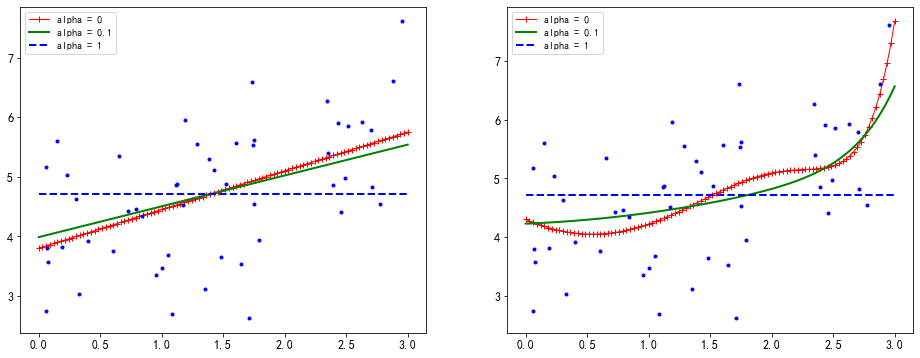

In [153]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(16,6))
plt.subplot(121)
plot_model(Lasso, (0,0.1,1), False)
plt.subplot(122)
plot_model(Lasso, (0,0.1,1), True)